<a href="https://colab.research.google.com/github/sumaiyakawsar/NLP_Masters_Class/blob/main/Lab5_NLP_220823_Parse_Tree_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries to install to get the PARSE TREE printed in COLAB

In [1]:
"""### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

from IPython.display import display"""


"### CREATE VIRTUAL DISPLAY ###\n!apt-get install -y xvfb # Install X Virtual Frame Buffer\nimport os\nos.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8\nos.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.\n\n%matplotlib inline\n\n### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###\n!apt install ghostscript python3-tk\n\nfrom IPython.display import display"

## Parse Tree 01

In [2]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', 'write', 'a', 'book']


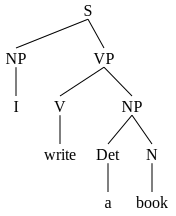

In [3]:
import nltk
nltk.download('punkt')

text2 = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | PP NP | Det N PP | 'I'
VP -> V NP | VP PP | V
Det -> 'a'
N -> 'book'
V -> 'write'
""")
text1 = nltk.tokenize.word_tokenize("I write a book")
print(text1)
parser = nltk.ChartParser(text2)
for tree in parser.parse(text1):
  display(tree) # tree.draw()
# print(tree)

## Parse Tree 02

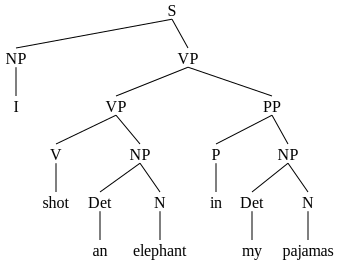

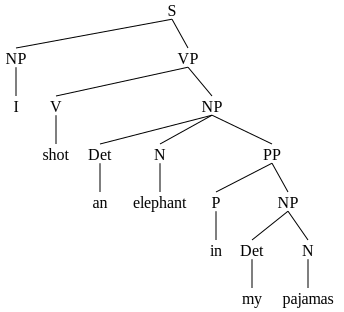

In [4]:
import nltk

groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
  display(tree)

## Parse Tree 03

['Alice', 'loves', 'Bob']



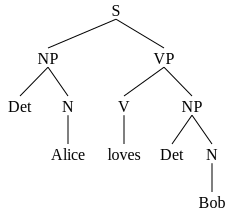

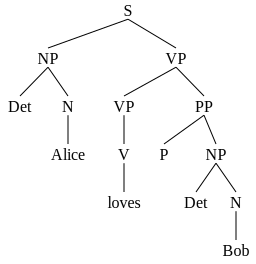

['Alice', 'loves', 'Bob']



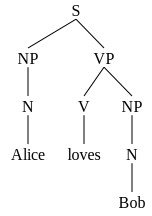

In [5]:
import nltk

text2 = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | PP NP | Det N PP
VP -> V NP | VP PP | V
N -> 'Alice' | 'Bob'
V -> 'loves'
Det ->
P ->
""")
text1 = nltk.tokenize.word_tokenize("Alice loves Bob")
print(text1)
print()
parser = nltk.ChartParser(text2)
for tree in parser.parse(text1):
    display(tree)

# ~~~~~~~~~~~~~~~~~~~~ Another way of writing the code ~~~~~~~~~~~~~~~~~~~~

import nltk

text2 = nltk.CFG.fromstring("""
S -> NP VP
NP -> N
VP -> V NP | VP PP | V
N -> 'Alice' | 'Bob'
V -> 'loves'
""")
text1 = nltk.tokenize.word_tokenize("Alice loves Bob")
print(text1)
print()
parser = nltk.ChartParser(text2)
for tree in parser.parse(text1):
    display(tree)

## Parse Tree 04 – Adjective Phrase

The little bear saw the fine fat trout in the brook

Clue:
NP --> DT Nom


Nom --> Adj N | Adj Adj N

['the', 'little', 'bear', 'saw', 'the', 'fine', 'fat', 'trout', 'in', 'the', 'brook']



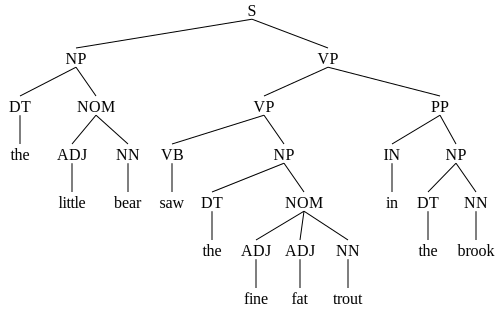

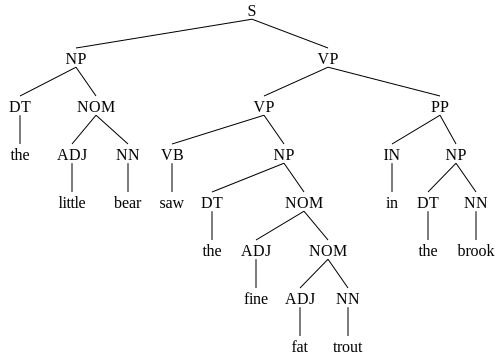

In [6]:
import nltk

text2 = nltk.CFG.fromstring("""
S -> NP VP
NP -> DT NOM | DT NN | 'the'
NOM -> ADJ NOM | ADJ NN | ADJ ADJ NN
VP -> VB NP | VP PP
PP -> IN NP
ADJ -> 'little' | 'fine' | 'fat'
IN -> 'in'
VB -> 'saw'
DT -> 'the'
NN -> 'bear' | 'trout' | 'brook'
""")

text1 = nltk.tokenize.word_tokenize("the little bear saw the fine fat trout in the brook")
print(text1)
print()
parser = nltk.ChartParser(text2)
for tree1 in parser.parse(text1):
  display(tree1)

## Parse Tree 05 – Adjective Phrase

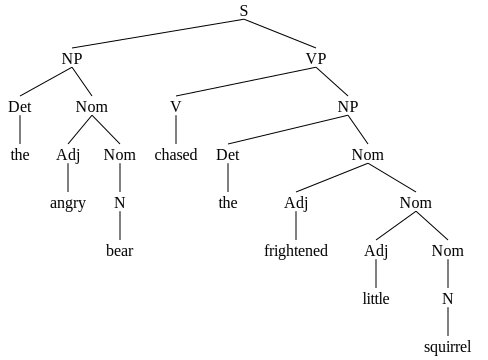

In [7]:
import nltk

grammar2 = nltk.CFG.fromstring("""
S  -> NP VP
NP -> Det Nom | Det N
Nom -> Adj Nom | N
VP -> V Adj | V NP | V | V NP PP
PP -> P NP
Det -> 'the'
N -> 'bear' | 'squirrel'
Adj  -> 'angry' | 'frightened' |  'little'
V ->  'chased'
""")

sent = ['the', 'angry', 'bear', 'chased', 'the', 'frightened', 'little', 'squirrel']
parser = nltk.ChartParser(grammar2)
for tree in parser.parse(sent):
  display(tree)

**NOTE:**

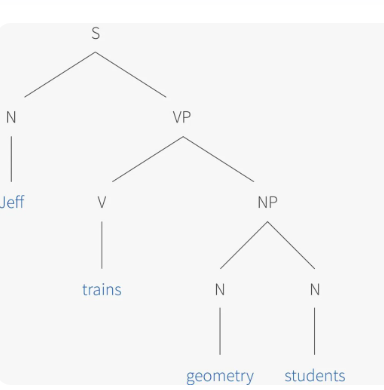


## Parse Tree 06 – Adverb Phrases (AdvP)

Clue:
VP --> V ADV

ADV --> DEG ADV

['Ken', 'snores', 'very', 'loudly']


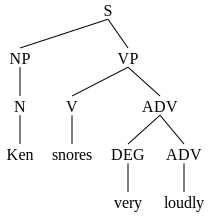

In [ ]:
import nltk

sentence = "Ken snores very loudly"

gram = nltk.CFG.fromstring("""
S -> NP VP
NP -> N
VP -> V ADV
N -> 'Ken'
V -> 'snores'
DEG -> 'very'
ADV -> DEG ADV | 'loudly'
""")

token = nltk.tokenize.word_tokenize(sentence)
print(token)
parser = nltk.ChartParser(gram)
for tree in parser.parse(token):
  display(tree)

unfortunately the cat killed the mouse


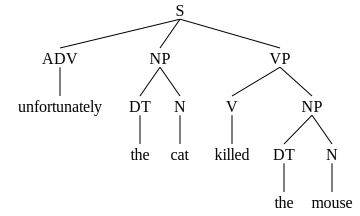

the cat unfortunately killed the mouse


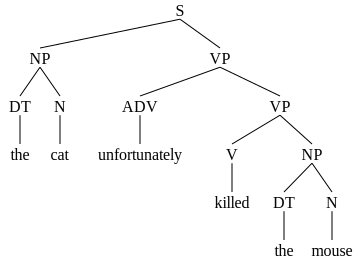

the cat killed the mouse unfortunately


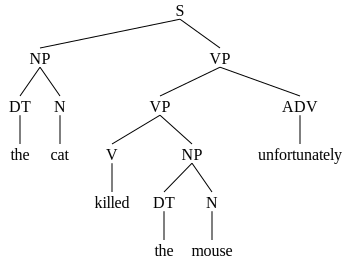

In [8]:
import nltk

from nltk.tokenize import word_tokenize

sents = [
    "unfortunately the cat killed the mouse",
    "the cat unfortunately killed the mouse",
    "the cat killed the mouse unfortunately"
]

grammar = nltk.CFG.fromstring("""
S -> ADV NP VP | NP VP
NP -> DT N
VP -> ADV VP | VP ADV | V NP
DT -> 'the'
N -> 'cat' | 'mouse'
V -> 'killed'
ADV -> 'unfortunately'
""")

parser = nltk.ChartParser(grammar)

for sent in sents:
    print(sent)
    for tree in parser.parse(word_tokenize(sent)):
      display(tree)

**NOTE:**

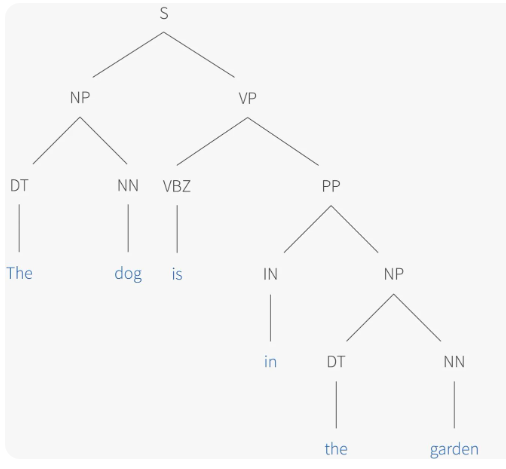

**Handling Conjunctions in Parse Tree**

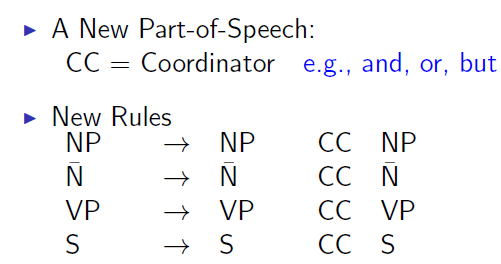

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


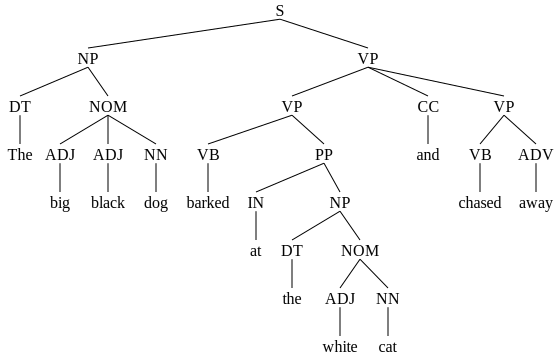

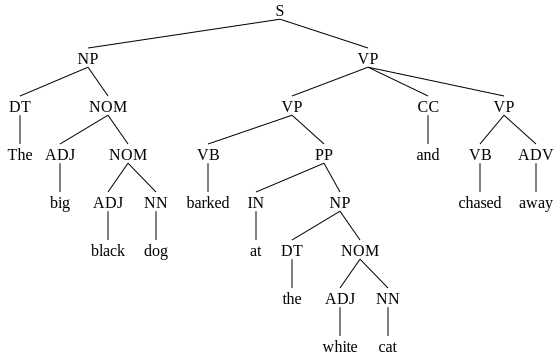

In [9]:
import nltk
nltk.download('punkt')

sentence = "The big black dog barked at the white cat and chased away"
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP ->  DT NOM | DT NN | CC NP
NOM -> ADJ NOM | ADJ NN |ADJ ADJ NN
VP -> VB NP | VB PP | VB ADV | VP CC VP
PP -> IN NP
ADJ -> 'big' | 'black' | 'white'
IN -> 'at'
VB -> 'barked' | 'chased'
DT -> 'The' | 'the'
NN -> 'big' | 'black' | 'dog' | 'cat'
ADV -> 'away'
CC -> 'and'
""")

# tokenize the words and remove '.' at the end of sentence
tokens = nltk.tokenize.word_tokenize(sentence)
# derivation must go along the parser
parser = nltk.ChartParser(grammar)
for tree in parser.parse(tokens):
  display(tree)

In [11]:
import nltk
nltk.download('words')
from nltk.corpus import words

string = "thesistermisslow"
tokens = []
lowercaseCorpus = [x.lower() for x in words.words()]
i=0
while i <len(string):
  maxWord = ""
  for j in range(i, len(string)):
    tempWord = string[i:j+1]
    if tempWord in lowercaseCorpus and len(tempWord) > len(maxWord):
      maxWord = tempWord
  i = i+len(maxWord)
  tokens.append(maxWord)
print(tokens)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['thesis', 'term', 'is', 'slow']
